# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [66]:
# import libraries here
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [21]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 2.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer 
df = pd.read_csv('Employee.csv', engine='python')
df.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer 
media_salary = pd.pivot_table(df, values='Salary', index='Department', aggfunc='mean')
media_salary

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [7]:
# your answer 
df.groupby('Department')['Salary'].mean().to_frame()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [8]:
# your answer here
group = pd.pivot_table(df, values='Salary', index=['Department','Title'], aggfunc='mean')
group

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [67]:
# your answer here
group = pd.pivot_table(df, index=['Title', 'Years'], values='Salary')
group

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [11]:
# your answer here
inf = df.pivot_table(values=['Salary', 'Name'], index=['Department', 'Title'], aggfunc={'Salary': np.mean, 'Department': 'count'})
inf

Department  Salary
Department Title                        
HR         VP                  1    70.0
           analyst             2    32.5
IT         VP                  1    70.0
           analyst             2    32.5
           associate           1    60.0
Sales      associate           2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [12]:
# your answer here
hello = df.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc={'Salary': [np.median, np.min, np.max, np.std]})
hello

amax  amin  median       std
Department Title                                  
HR         VP           70    70    70.0       NaN
           analyst      35    30    32.5  3.535534
IT         VP           70    70    70.0       NaN
           analyst      35    30    32.5  3.535534
           associate    60    60    60.0       NaN
Sales      associate    55    55    55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [13]:
# Los voy a rellenar por 0. Eso significa que los datos tienden a estar cerca de la media
hello.fillna(0)

amax  amin  median       std
Department Title                                  
HR         VP           70    70    70.0  0.000000
           analyst      35    30    32.5  3.535534
IT         VP           70    70    70.0  0.000000
           analyst      35    30    32.5  3.535534
           associate    60    60    60.0  0.000000
Sales      associate    55    55    55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [14]:
# your answer here
money_spent = df.groupby('Department')[['Name', 'Salary']].agg({'Name': 'count', 'Salary': 'sum'})
money_spent

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [15]:
# your answer here
total_years = df.groupby('Department')[['Name', 'Salary','Years']].agg({'Salary': np.mean,'Years': 'sum'})
total_years

,Salary,Years
Department,,
HR,45.00,14
IT,48.75,18
Sales,55.00,5


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
# your answer here

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [16]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [19]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [18]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [24]:
# your answer here
stats.spearmanr(fitbit.Steps, fitbit['Minutes Very Active'])

SignificanceResult(statistic=0.6321453084956241, pvalue=2.4117288375648958e-42)

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [25]:
# your answer here
import matplotlib as plt
from matplotlib.pyplot import scatter
import pylab as plt

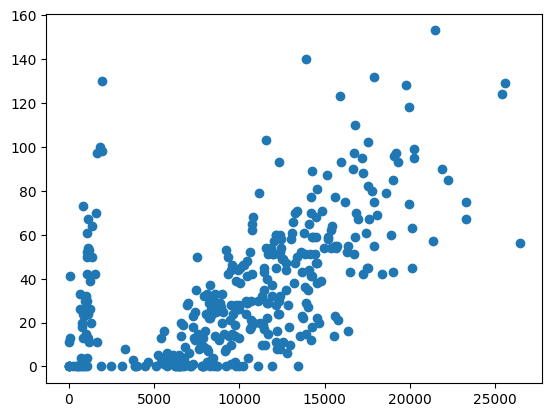

In [26]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [28]:
# your comment here

# Los datos están dispersos, pero vemos que cuando hay pocos steps, los minutos suben mucho. Vemos que hay una especie de columna al principio. Aunque eso también ocurre con más steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [29]:
# your answer here
stats.spearmanr(fitbit.Steps, fitbit['Minutes Sedentary'])

SignificanceResult(statistic=-0.12199693227604606, pvalue=0.01939289385455601)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

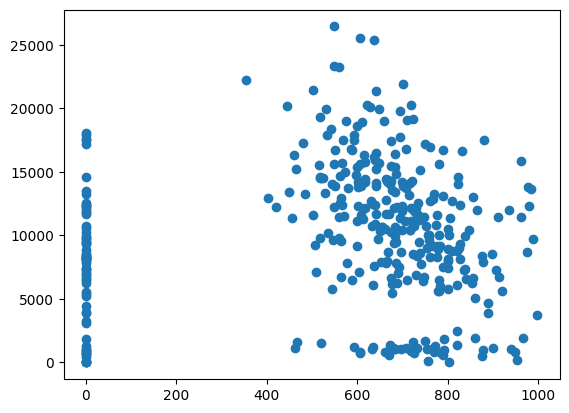

In [30]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

In [ ]:
# Your comment here

# Se entiende que no hay mucha correlación, porque si la hubiese, los puntos aparecerían en forma de línea diagonal

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [31]:
# your answer here
stats.spearmanr(fitbit.Steps, fitbit['MinutesOfSleep'])

SignificanceResult(statistic=0.09310892758263728, pvalue=0.07483123561821318)

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

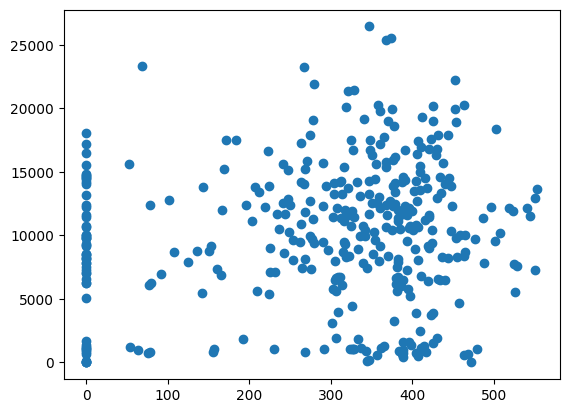

In [32]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [34]:
# your answer here
column = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
correlation = column.corr()
correlation

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [35]:
# your answer here
correlation.loc['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [42]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

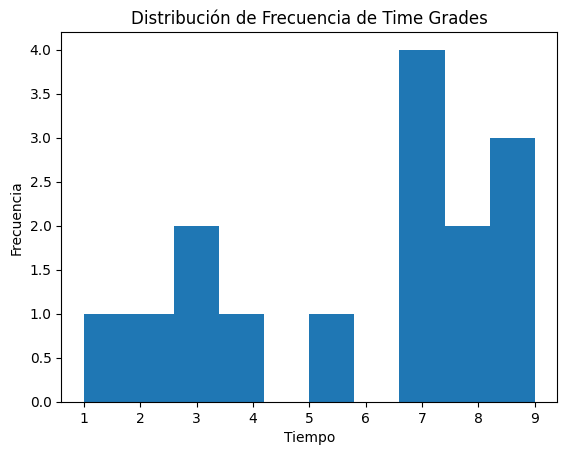

In [57]:
import matplotlib.pyplot as plt

plt.hist(time_grades['Grade'], bins=10)

plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Frecuencia de Time Grades')

plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [60]:
# your answer 
stats.spearmanr(time_grades.Grade, time_grades['Study time'])

# Parece que sí hay correlación

SignificanceResult(statistic=0.819658753036942, pvalue=0.00018377469445788485)

In [62]:
# your answer
stats.pearsonr(time_grades.Grade, time_grades['Study time'])

# Aquí también

PearsonRResult(statistic=0.7980456073578858, pvalue=0.0003627635256342715)

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

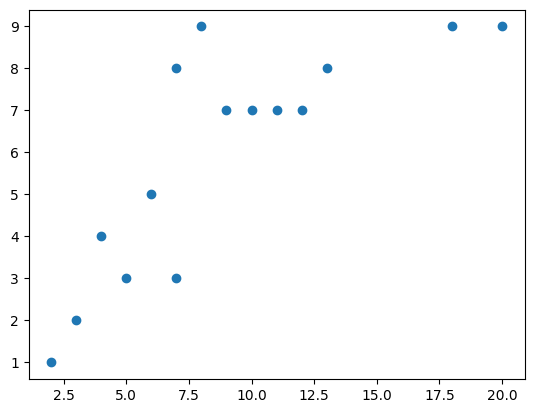

In [65]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

In [ ]:
#your comment here

# Según lo que calculamos anteriormente, la correlación existe, aunque en el gráfico no se nota tanto, pero si nos fijamos, sí que se va formando una especie de línea diagonal con los datos.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#your comment here

# La correlación de Pearson mide la relación lineal entre dos variables, mientras que 
# La de Spearman mide la relación monótona entre dos variables. Se refiere a la relación en la que una variable aumenta o disminuye de manera constante con la otra variable, aunque no necesariamente de manera lineal.